In [4]:
!pip install midiutil

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 27.9 MB/s 
  Created wheel for midiutil: filename=MIDIUtil-1.2.1-py3-none-any.whl size=54566 sha256=073c86bd31468f7d9c410f59e0f7b583683ddfa62d333963c0c97ebac234f7b9
  Stored in directory: /root/.cache/pip/wheels/55/14/ba/8d51301658e4a79bbcc3a1a1fd3ea32abc72798fc9e92b56fa
Successfully built midiutil


In [5]:
!pip install pedalboard


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 33.8 MB/s 


In [6]:
#Importing modules
import cv2
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import IPython.display as ipd
import librosa
from midiutil import MIDIFile
import random
from pedalboard import Pedalboard, Chorus, Reverb
from pedalboard.io import AudioFile

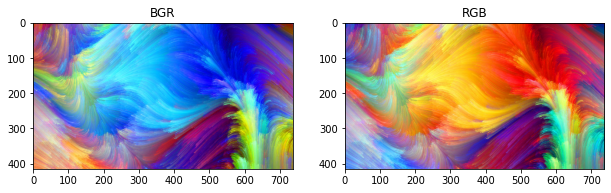

           Image Properties
Height =  415 Width =  737
Number of pixels in image =  305855


In [8]:
#Load the image
ori_img = cv2.imread('colors.jpg')
img = cv2.cvtColor(ori_img, cv2.COLOR_BGR2RGB)

#Get shape of image
height, width, depth = img.shape
dpi = plt.rcParams['figure.dpi']#generate multiple plots and need them all to be the same size.
figsize = width / float(dpi), height / float(dpi)

#Plot the image
fig, axs = plt.subplots(1, 2, figsize = figsize)
axs[0].title.set_text('BGR') 
axs[0].imshow(ori_img)
axs[1].title.set_text('RGB') 
axs[1].imshow(img)
plt.show()
print('           Image Properties')
print('Height = ',height, 'Width = ', width)
print('Number of pixels in image = ', height * width)

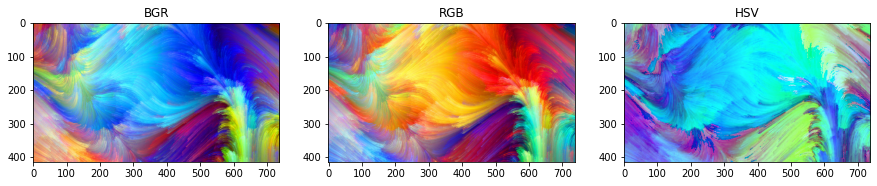

In [9]:
#Need function that reads pixel hue value 
hsv = cv2.cvtColor(ori_img, cv2.COLOR_BGR2HSV)
#Plot the image
fig, axs = plt.subplots(1, 3, figsize = (15,15))
names = ['BGR','RGB','HSV']
imgs  = [ori_img, img, hsv]
i = 0
for elem in imgs:
    axs[i].title.set_text(names[i])
    axs[i].imshow(elem)
    axs[i].grid(False)
    i += 1
plt.show()

In [10]:
i=0 ; j=0
#Initialize array the will contain Hues for every pixel in image
hues = [] 
for i in range(height):
    for j in range(width):
        hue = hsv[i][j][0] #This is the hue value at pixel coordinate (i,j)
        hues.append(hue)

In [14]:
pixels_df = pd.DataFrame(hues, columns=['hues'])
pixels_df

,hues
0,112
1,113
2,111
3,108
4,108
...,...
305850,95
305851,95
305852,98
305853,100


In [11]:
#Define frequencies that make up A-Harmonic Minor Scale
scale_freqs = [220.00, 246.94 ,261.63, 293.66, 329.63, 349.23, 415.30] 
def hue2freq(h,scale_freqs):
    thresholds = [26 , 52 , 78 , 104,  128 , 154 , 180]
    note = scale_freqs[0]
    if (h <= thresholds[0]):
         note = scale_freqs[0]
    elif (h > thresholds[0]) & (h <= thresholds[1]):
        note = scale_freqs[1]
    elif (h > thresholds[1]) & (h <= thresholds[2]):
        note = scale_freqs[2]
    elif (h > thresholds[2]) & (h <= thresholds[3]):
        note = scale_freqs[3]
    elif (h > thresholds[3]) & (h <= thresholds[4]):    
        note = scale_freqs[4]
    elif (h > thresholds[4]) & (h <= thresholds[5]):
        note = scale_freqs[5]
    elif (h > thresholds[5]) & (h <= thresholds[6]):
        note = scale_freqs[6]
    else:
        note = scale_freqs[0]
    
    return note


In [15]:
pixels_df['notes'] = pixels_df.apply(lambda row : hue2freq(row['hues'],scale_freqs), axis = 1)     
pixels_df

,hues,notes
0,112,329.63
1,113,329.63
2,111,329.63
3,108,329.63
4,108,329.63
...,...,...
305850,95,293.66
305851,95,293.66
305852,98,293.66
305853,100,293.66


In [16]:
frequencies = pixels_df['notes'].to_numpy()

In [17]:
song = np.array([]) 
sr = 22050 # sample rate
T = 0.1    # 0.1 second duration
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
#Make a song with numpy array :]
#nPixels = int(len(frequencies))#All pixels in image
nPixels = 60
for i in range(nPixels):  
    val = frequencies[i]
    note  = 0.5*np.sin(2*np.pi*val*t)
    song  = np.concatenate([song, note])
ipd.Audio(song, rate=sr) # load a NumPy array


In [18]:
from scipy.io import wavfile
wavfile.write('ini_song.wav'    , rate = 22050, data = song.astype(np.float32))

In [19]:
song = np.array([]) 
octaves = np.array([0.5,1,2])
sr = 22050 # sample rate
T = 0.1    # 0.1 second duration
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
#Make a song with numpy array :]
#nPixels = int(len(frequencies))#All pixels in image
nPixels = 60
for i in range(nPixels):
    octave = random.choice(octaves)
    val =  octave * frequencies[i]
    note  = 0.5*np.sin(2*np.pi*val*t)
    song  = np.concatenate([song, note])
ipd.Audio(song, rate=sr) # load a NumPy array

In [20]:
wavfile.write('octave_song.wav'    , rate = 22050, data = song.astype(np.float32))

In [21]:
song = np.array([]) 
octaves = np.array([1/2,1,2])
sr = 22050 # sample rate
T = 0.1    # 0.1 second duration
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
#Make a song with numpy array :]
#nPixels = int(len(frequencies))#All pixels in image
nPixels = 60
for i in range(nPixels):
    octave = random.choice(octaves)
    val =  octave * random.choice(frequencies)
    note  = 0.5*np.sin(2*np.pi*val*t)
    song  = np.concatenate([song, note])
ipd.Audio(song, rate=sr) # load a NumPy array

In [22]:
wavfile.write('random_song.wav'    , rate = 22050, data = song.astype(np.float32))

In [23]:
def img2music(img, scale = [220.00, 246.94 ,261.63, 293.66, 329.63, 349.23, 415.30],
              sr = 22050, T = 0.1, nPixels = 60, useOctaves = True, randomPixels = False,
              harmonize = 'U0'):
    """
    Args:
        img    :     (array) image to process
        scale  :     (array) array containing frequencies to map H values to
        sr     :     (int) sample rate to use for resulting song
        T      :     (int) time in seconds for dutation of each note in song
        nPixels:     (int) how many pixels to use to make song
    Returns:
        song   :     (array) Numpy array of frequencies. Can be played by ipd.Audio(song, rate = sr)
    """
    #Convert image to HSV
    hsv = cv2.cvtColor(ori_img, cv2.COLOR_BGR2HSV)
    
    #Get shape of image
    height, width, depth = ori_img.shape

    i=0 ; j=0 ; k=0
    #Initialize array the will contain Hues for every pixel in image
    hues = [] 
    for i in range(height):
        for j in range(width):
            hue = hsv[i][j][0] #This is the hue value at pixel coordinate (i,j)
            hues.append(hue)
            
    #Make dataframe containing hues and frequencies
    pixels_df = pd.DataFrame(hues, columns=['hues'])
    pixels_df['frequencies'] = pixels_df.apply(lambda row : hue2freq(row['hues'],scale), axis = 1) 
    frequencies = pixels_df['frequencies'].to_numpy()
    
    #Make harmony dictionary (i.e. fundamental, perfect fifth, major third, octave)
    #unison           = U0 ; semitone         = ST ; major second     = M2
    #minor third      = m3 ; major third      = M3 ; perfect fourth   = P4
    #diatonic tritone = DT ; perfect fifth    = P5 ; minor sixth      = m6
    #major sixth      = M6 ; minor seventh    = m7 ; major seventh    = M7
    #octave           = O8
    harmony_select = {'U0' : 1,
                      'ST' : 16/15,
                      'M2' : 9/8,
                      'm3' : 6/5,
                      'M3' : 5/4,
                      'P4' : 4/3,
                      'DT' : 45/32,
                      'P5' : 3/2,
                      'm6': 8/5,
                      'M6': 5/3,
                      'm7': 9/5,
                      'M7': 15/8,
                      'O8': 2
                     }
    harmony = np.array([]) #This array will contain the song harmony
    harmony_val = harmony_select[harmonize] #This will select the ratio for the desired harmony
                                               
    song_freqs = np.array([]) #This array will contain the chosen frequencies used in our song :]
    song = np.array([])       #This array will contain the song signal
    octaves = np.array([0.5,1,2])#Go an octave below, same note, or go an octave above
    t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
    #Make a song with numpy array :]
    #nPixels = int(len(frequencies))#All pixels in image
    for k in range(nPixels):
        if useOctaves:
            octave = random.choice(octaves)
        else:
            octave = 1
        
        if randomPixels == False:
            val =  octave * frequencies[k]
        else:
            val = octave * random.choice(frequencies)
            
        #Make note and harmony note    
        note   = 0.5*np.sin(2*np.pi*val*t)
        h_note = 0.5*np.sin(2*np.pi*harmony_val*val*t)  
        
        #Place notes into corresponfing arrays
        song       = np.concatenate([song, note])
        harmony    = np.concatenate([harmony, h_note])                                     
        #song_freqs = np.concatenate([song_freqs, val])
                                               
    return song, pixels_df, harmony

In [26]:
def makeScale(whichOctave, whichKey, whichScale, makeHarmony = 'U0'):
    
    #Load note dictionary
    note_freqs = get_piano_notes()
    
    #Define tones. Upper case are white keys in piano. Lower case are black keys
    scale_intervals = ['A','a','B','C','c','D','d','E','F','f','G','g']
    
    #Find index of desired key
    index = scale_intervals.index(whichKey)
    
    #Redefine scale interval so that scale intervals begins with whichKey
    new_scale = scale_intervals[index:12] + scale_intervals[:index]
    
    #Choose scale
    if whichScale == 'AEOLIAN':
        scale = [0, 2, 3, 5, 7, 8, 10]
    elif whichScale == 'BLUES':
        scale = [0, 2, 3, 4, 5, 7, 9, 10, 11]
    elif whichScale == 'PHYRIGIAN':
        scale = [0, 1, 3, 5, 7, 8, 10]
    elif whichScale == 'CHROMATIC':
        scale = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
    elif whichScale == 'DIATONIC_MINOR':
        scale = [0, 2, 3, 5, 7, 8, 10]
    elif whichScale == 'DORIAN':
        scale = [0, 2, 3, 5, 7, 9, 10]
    elif whichScale == 'HARMONIC_MINOR':
        scale = [0, 2, 3, 5, 7, 8, 11]
    elif whichScale == 'LYDIAN':
        scale = [0, 2, 4, 6, 7, 9, 11]
    elif whichScale == 'MAJOR':
        scale = [0, 2, 4, 5, 7, 9, 11]
    elif whichScale == 'MELODIC_MINOR':
        scale = [0, 2, 3, 5, 7, 8, 9, 10, 11]
    elif whichScale == 'MINOR':    
        scale = [0, 2, 3, 5, 7, 8, 10]
    elif whichScale == 'MIXOLYDIAN':     
        scale = [0, 2, 4, 5, 7, 9, 10]
    elif whichScale == 'NATURAL_MINOR':   
        scale = [0, 2, 3, 5, 7, 8, 10]
    elif whichScale == 'PENTATONIC':    
        scale = [0, 2, 4, 7, 9]
    else:
        print('Invalid scale name')
      
    #Make harmony dictionary (i.e. fundamental, perfect fifth, major third, octave)
    #unison           = U0
    #semitone         = ST
    #major second     = M2
    #minor third      = m3
    #major third      = M3
    #perfect fourth   = P4
    #diatonic tritone = DT
    #perfect fifth    = P5
    #minor sixth      = m6
    #major sixth      = M6
    #minor seventh    = m7
    #major seventh    = M7
    #octave           = O8
    harmony_select = {'U0' : 1,
                      'ST' : 16/15,
                      'M2' : 9/8,
                      'm3' : 6/5,
                      'M3' : 5/4,
                      'P4' : 4/3,
                      'DT' : 45/32,
                      'P5' : 3/2,
                      'm6': 8/5,
                      'M6': 5/3,
                      'm7': 9/5,
                      'M7': 15/8,
                      'O8': 2
                     }
    
    #Get length of scale (i.e., how many notes in scale)
    nNotes = len(scale)
    
    #Initialize arrays
    freqs = []
    #harmony = []
    #harmony_val = harmony_select[makeHarmony]
    for i in range(nNotes):
        note = new_scale[scale[i]] + str(whichOctave)
        freqToAdd = note_freqs[note]
        freqs.append(freqToAdd)
        #harmony.append(harmony_val*freqToAdd)
    return freqs#,harmony

In [28]:
def get_piano_notes():   
    # White keys are in Uppercase and black keys (sharps) are in lowercase
    octave = ['C', 'c', 'D', 'd', 'E', 'F', 'f', 'G', 'g', 'A', 'a', 'B'] 
    base_freq = 440 #Frequency of Note A4
    keys = np.array([x+str(y) for y in range(0,9) for x in octave])
    # Trim to standard 88 keys
    start = np.where(keys == 'A0')[0][0]
    end = np.where(keys == 'C8')[0][0]
    keys = keys[start:end+1]
    
    note_freqs = dict(zip(keys, [2**((n+1-49)/12)*base_freq for n in range(len(keys))]))
    note_freqs[''] = 0.0 # stop
    return note_freqs

def get_sine_wave(frequency, duration, sample_rate=44100, amplitude=4096):
    t = np.linspace(0, duration, int(sample_rate*duration)) # Time axis
    wave = amplitude*np.sin(2*np.pi*frequency*t)
    return wave

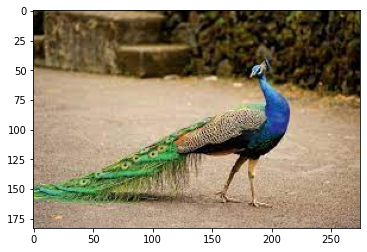

In [24]:
#Peacock
peacock = cv2.imread('download.jpg')
peacock2 = cv2.cvtColor(peacock, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(peacock2)
plt.grid(False)
plt.show()

In [29]:
peacock_scale = makeScale(3, 'E', 'DORIAN')
peacock_song, peacock_df, peacock_song_harmony  = img2music(peacock, 
                                                            peacock_scale, 
                                                            T = 0.2, 
                                                            randomPixels = False,
                                                            useOctaves = True, nPixels = 120)

wavfile.write('peacock_song.wav'    , rate = 22050, data = peacock_song.astype(np.float32))
ipd.Audio(peacock_song, rate = sr)
